<a href="https://colab.research.google.com/github/merrcahoon/Asg7/blob/main/Lab7Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11501568/11490434 [==============================] - 0s 0us/step


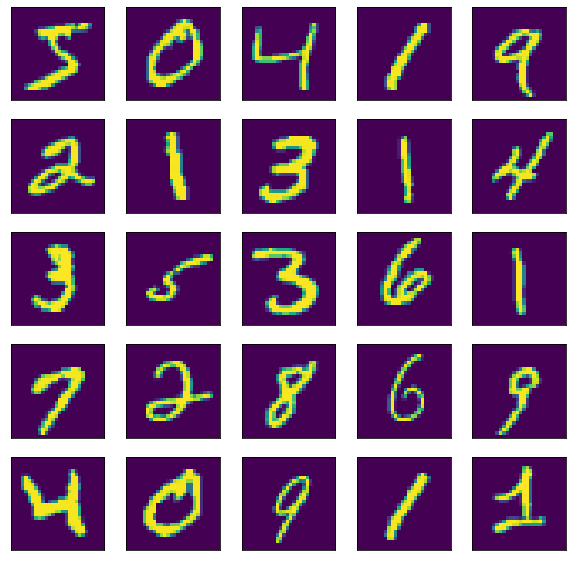

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 20)        520       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 20)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2880)              0         
                                                                 
 dense (Dense)               (None, 100)               288100    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 289,630
Trainable params: 289,630
Non-trainable params: 0
__________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 30s 16ms/step - loss: 0.1469 - accuracy: 0.9557 - val_loss: 0.0560 - val_accuracy: 0.9812
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0507 - accuracy: 0.9840 - val_loss: 0.0491 - val_accuracy: 0.9831
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0341 - accuracy: 0.9895 - val_loss: 0.0418 - val_accuracy: 0.9858
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0243 - accuracy: 0.9925 - val_loss: 0.0459 - val_accuracy: 0.9861
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0188 - accuracy: 0.9938 - val_loss: 0.0408 - val_accuracy: 0.9873
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0128 - accuracy: 0.9957 - val_loss: 0.0447 - val_accuracy: 0.9878
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0116 - accuracy: 0.9961 - val_loss: 0.0398 - val_accura

In [ ]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load the MNIST data
(Xtrain, ytrain), (Xtest, ytest) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
Xtrain, Xtest = Xtrain / 255.0, Xtest / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Xtrain[i])
plt.show()

model = models.Sequential()
model.add(layers.Conv2D(20, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(Xtrain, ytrain, epochs=10, 
                    validation_data=(Xtest, ytest))

In [ ]:
print(np.shape(Xtrain))
print(Xtrain[0])
print(np.shape(ytrain))

(60000, 28, 28)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0

In [ ]:
# you must run previous code cell to train the digit recognition model
# load the photoshop digits and get them into keras compatible format

import numpy as np 
from PIL import Image

test_data = [] 
test_labels = []
for digit in range(10): 
  im = Image.open(f"/content/drive/MyDrive/Colab Notebooks/{digit}ps4.png","r") 
  pixels = list(im.getdata()) 
  pixels = [(255-comp)/255. for (comp, _, _) in pixels] 
  test_data.append(np.reshape(pixels,(28,28)))
  test_labels.append(digit)
#print(np.shape(test_data))
#print(test_data[0])
#print(np.shape(test_labels))
#print(test_labels[0])
#print(Xtrain[:1])
predictions = model.predict(np.array(test_data))
print(predictions)
print([np.argmax(p) for p in predictions])

[[9.99997377e-01 1.64799077e-11 7.95448651e-10 2.85070492e-12
  5.98459487e-13 3.67577883e-07 8.66353567e-09 1.84268572e-06
  1.49471575e-07 1.99709717e-07]
 [1.54995110e-08 9.99989271e-01 1.09603338e-09 1.54744162e-10
  6.52382096e-06 2.34767927e-10 4.59925431e-09 4.17049750e-06
  2.84717725e-08 9.66550839e-10]
 [6.14213832e-17 3.63849573e-08 9.99999881e-01 1.38005807e-09
  1.49920665e-18 1.41840133e-20 1.45087282e-23 3.15718474e-08
  8.18532631e-10 5.28533207e-16]
 [4.36406175e-24 5.76594978e-12 2.70797626e-13 1.00000000e+00
  8.75181758e-16 4.05055263e-15 9.28166839e-25 1.35411283e-11
  2.51660821e-16 4.84793209e-15]
 [5.70720678e-15 3.48964981e-08 2.00258941e-11 2.83219195e-13
  1.00000000e+00 8.13029602e-13 1.52072239e-08 3.58886854e-09
  1.49668522e-09 3.75482414e-12]
 [1.03413101e-23 2.16949933e-18 1.04358356e-21 1.98391368e-12
  1.43450890e-19 1.00000000e+00 5.17348751e-15 1.06464771e-17
  4.84837830e-14 1.78188145e-10]
 [2.86950410e-08 1.11702059e-09 1.52069237e-08 8.43013770e

In [ ]:
import time
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from PIL import Image

# returns a tuple (totaltime, accuracy)
def trialrun(numfeaturemaps, poolsize):
  # Load the CIFAR10 data
  (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

  # Normalize pixel values to be between 0 and 1
  train_images, test_images = train_images / 255.0, test_images / 255.0
  #train_images = train_images[:1000]
 # train_labels = train_labels[:1000]
 # test_images = test_images[:100]
 # test_labels = test_labels[:100]

  class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']


  model = models.Sequential()
  model.add(layers.Conv2D(numfeaturemaps/2, (3,3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D(poolsize))
  model.add(layers.Conv2D(numfeaturemaps, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(numfeaturemaps, (3,3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10))
  model.summary()
  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  start = time.time()
  history = model.fit(train_images, train_labels, epochs=10, 
                      validation_data=(test_images, test_labels))

  finish = time.time()
  elapsed = finish-start
  return(elapsed, np.max(history.history['accuracy']))

featmapresults = []
for numfeatmaps in [5, 10, 20, 30, 50]:
  featmapresults.append(trialrun(numfeatmaps, (3,3)))

poolresults = []
for poolsize in [(1,1), (2,2), (3,3)]:
  poolresults.append(trialrun(64, poolsize))




Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 2)         56        
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 10, 10, 2)        0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 8, 8, 5)           95        
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 4, 4, 5)          0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 2, 2, 5)           230       
                                                                 
 flatten_8 (Flatten)         (None, 20)               

In [ ]:
print(featmapresults)
print(poolresults)

[(171.74564671516418, 0.43389999866485596), (189.8343071937561, 0.5299999713897705), (218.09551453590393, 0.652239978313446), (382.77365350723267, 0.701200008392334), (402.4840850830078, 0.7404199838638306)]
[(1702.7908210754395, 0.9032800197601318), (682.5741441249847, 0.8102999925613403), (382.76376128196716, 0.7587000131607056)]


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


[0, 0, 0, 8, 0, 8, 0, 7, 0, 0, 0, 0, 8, 0, 0, 8, 0, 0, 0, 0, 0, 8, 5, 0, 5, 0, 0, 0, 0, 0, 7, 0, 9, 0, 3, 1, 7, 1, 7, 0, 9, 8, 3, 1, 2, 2, 1, 7, 1, 7, 9, 1, 0, 7, 7, 3, 1, 2, 2, 2, 2, 3, 7, 3, 7, 0, 2, 2, 2, 2, 3, 2, 2, 5, 7, 2, 2, 0, 3, 4, 2, 0, 7, 5, 2, 5, 3, 3, 7, 3, 5, 3, 5, 3, 3, 3, 3, 3, 0, 5, 5, 3, 5, 3, 5, 3, 3, 2, 5, 3, 3, 5, 5, 3, 3, 4, 4, 4, 7, 4, 4, 6, 8, 4, 4, 5, 3, 4, 4, 4, 7, 4, 4, 6, 4, 6, 3, 6, 8, 4, 4, 7, 4, 4, 4, 5, 4, 5, 2, 5, 7, 5, 2, 2, 5, 3, 5, 4, 3, 5, 2, 7, 1, 5, 5, 5, 5, 0, 5, 5, 6, 7, 5, 0, 6, 1, 3, 6, 6, 3, 6, 6, 6, 6, 6, 3, 6, 6, 2, 6, 5, 6, 2, 6, 6, 6, 6, 6, 4, 6, 6, 6, 3, 5, 7, 7, 7, 2, 5, 3, 7, 0, 7, 3, 7, 6, 7, 7, 7, 7, 7, 2, 7, 3, 7, 5, 3, 7, 6, 7, 7, 7, 7, 7, 9, 8, 0, 8, 8, 8, 8, 0, 8, 2, 0, 8, 8, 0, 0, 8, 0, 8, 8, 7, 8, 8, 0, 0, 8, 7, 8, 8, 1, 9, 9, 0, 9, 1, 1, 8, 9, 1, 1, 9, 9, 1, 0, 9, 0, 8, 1, 1, 9, 9, 1, 9, 9, 1, 1, 5]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

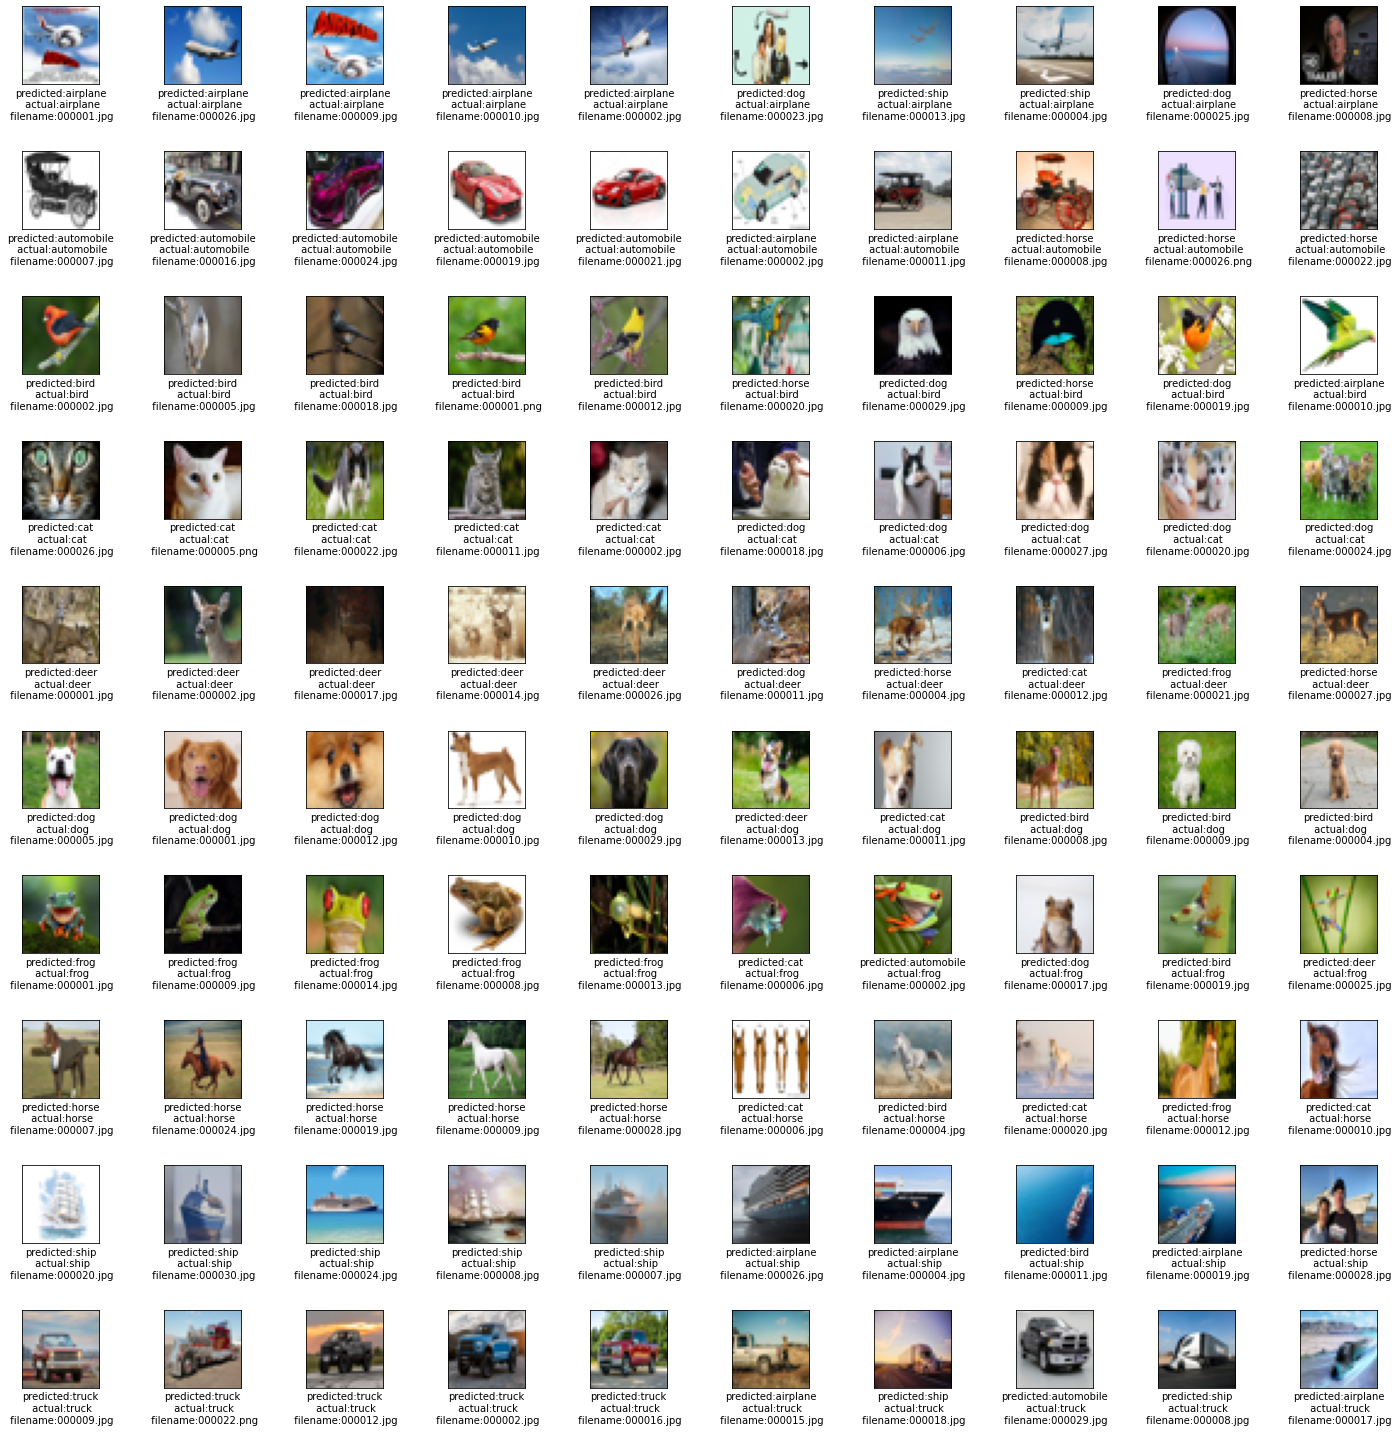

[5, 0, 0, 0, 0, 8, 0, 2, 1, 0, 0, 0, 8, 0, 0, 8, 0, 5, 0, 0, 0, 8, 5, 0, 8, 0, 0, 0, 0, 0, 3, 0, 9, 0, 6, 0, 7, 1, 3, 0, 1, 8, 3, 1, 0, 2, 1, 1, 0, 1, 9, 1, 0, 7, 6, 3, 1, 2, 0, 2, 5, 5, 6, 3, 7, 0, 2, 2, 2, 2, 7, 2, 2, 5, 2, 2, 6, 0, 3, 0, 2, 7, 7, 5, 2, 5, 3, 3, 0, 3, 3, 3, 5, 3, 3, 3, 3, 3, 0, 5, 2, 2, 3, 3, 5, 3, 5, 2, 6, 2, 3, 3, 3, 5, 3, 4, 5, 4, 7, 4, 4, 6, 0, 6, 4, 3, 3, 4, 5, 4, 4, 4, 4, 6, 4, 6, 3, 6, 8, 6, 4, 7, 6, 5, 6, 5, 4, 5, 5, 5, 2, 5, 4, 2, 7, 2, 5, 5, 3, 5, 2, 5, 7, 5, 5, 5, 5, 0, 5, 5, 6, 9, 5, 0, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 3, 6, 0, 0, 6, 3, 6, 2, 6, 6, 6, 6, 5, 6, 6, 2, 6, 3, 5, 7, 7, 7, 7, 5, 7, 7, 0, 7, 3, 2, 6, 7, 7, 4, 7, 7, 0, 7, 3, 7, 5, 3, 7, 6, 7, 2, 7, 7, 7, 8, 8, 0, 8, 9, 8, 8, 0, 8, 0, 0, 8, 8, 4, 0, 8, 0, 8, 0, 9, 8, 8, 8, 0, 8, 0, 8, 8, 0, 1, 9, 1, 9, 1, 0, 9, 9, 1, 1, 0, 9, 9, 7, 1, 0, 9, 1, 1, 9, 9, 8, 9, 9, 9, 1, 5]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

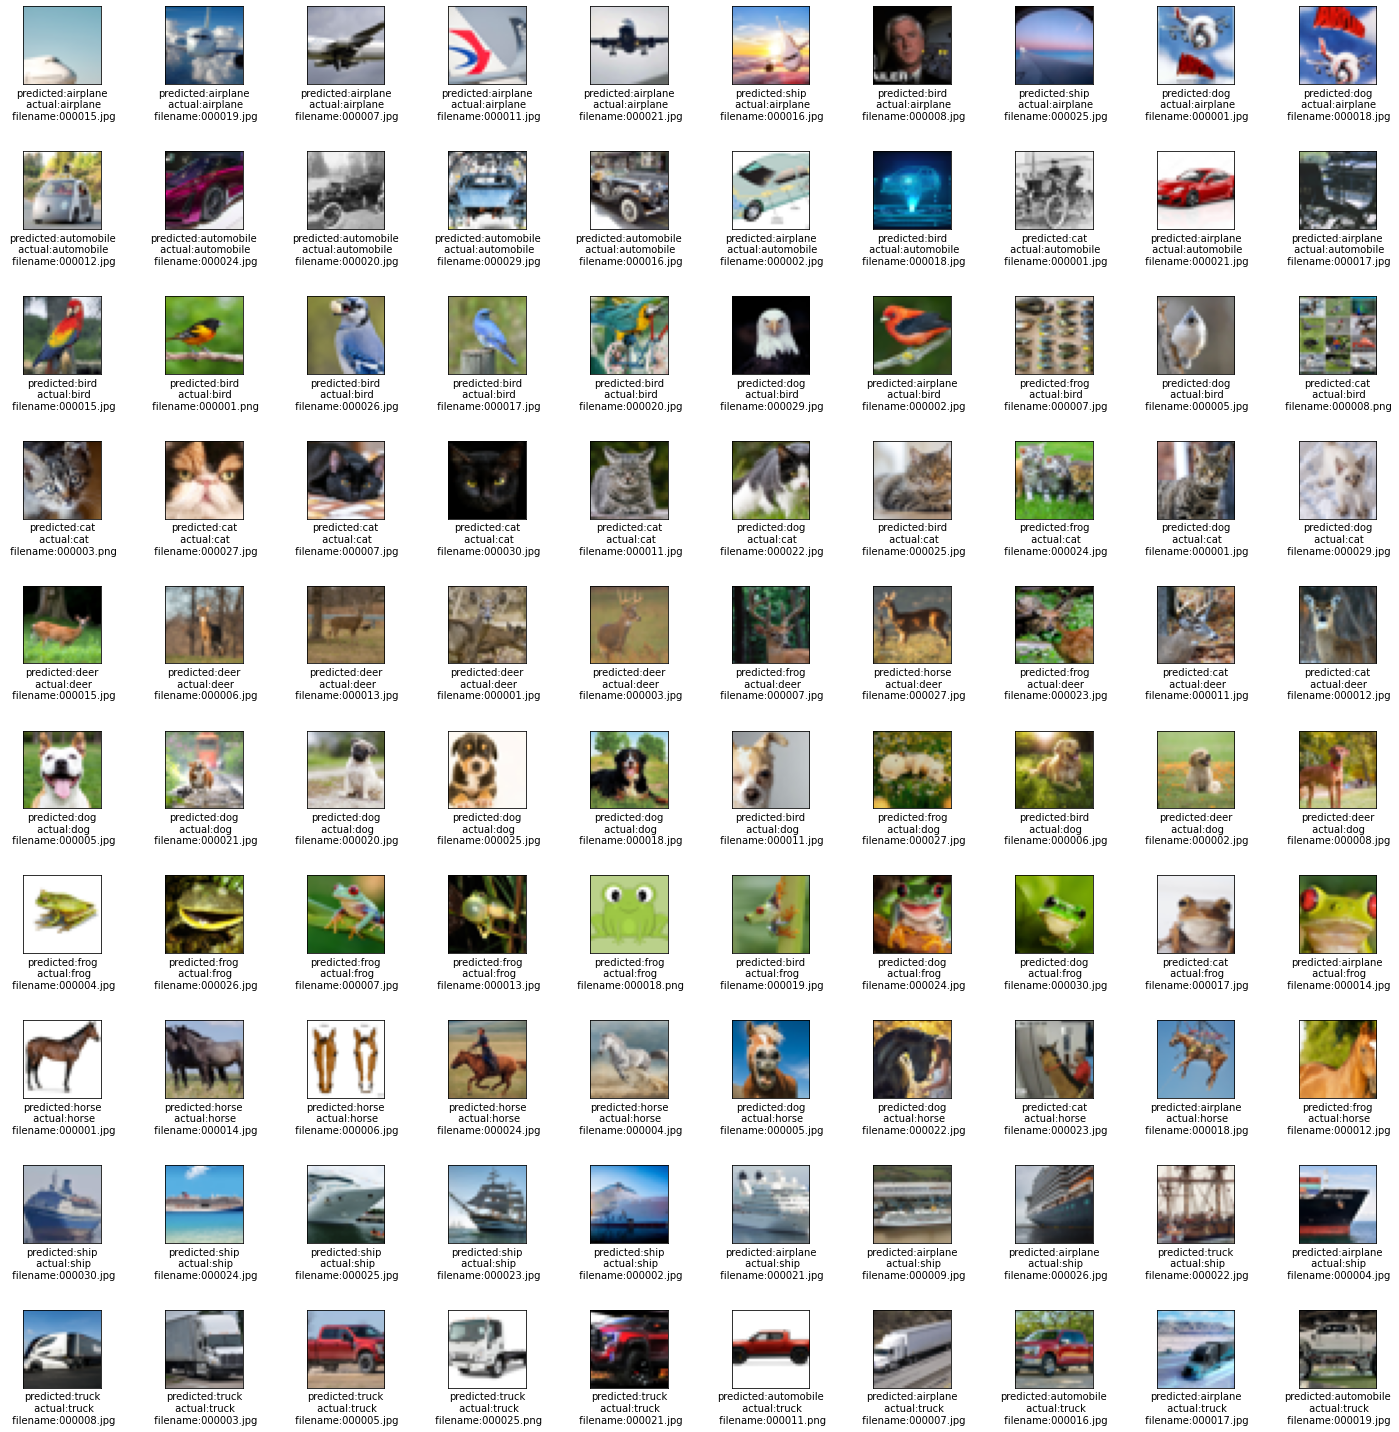

In [ ]:
# you must run the DownloadCIFAR10LikeData notebook first to download all the images into your cifartest folder
# then you must run the previous cell to train the CIFAR10 model!
# this cell simply resizes all the downloaded images to 32,32 naively without preserving scale
import os
import random as rd

# this cell resizes the largest square chunk from the center of the image preserving scale but potentially cropping data
# https://note.nkmk.me/en/python-pillow-image-crop-trimming/
def crop_center(pil_img, crop_width, crop_height):
    img_width, img_height = pil_img.size
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))

def crop_max_square(pil_img):
    return crop_center(pil_img, min(pil_img.size), min(pil_img.size))

# center specifies whether to do a square crop out of the center before resizing
def test_cifar_like_data(center = False):
  test_images = []
  test_data = []
  test_labels = []
  test_filenames = []
  for label, name in enumerate(class_names):
    directory_in_str = f"/content/drive/MyDrive/Colab Notebooks/cifartest/{name}"
    directory = os.fsencode(directory_in_str)
    for file in os.listdir(directory):
      filename = os.fsdecode(file)
      if filename.endswith(".jpg") or filename.endswith(".png"): 
        im = Image.open(directory_in_str + "/" + filename,"r")
        if center:
          im = crop_max_square(im)
        im = im.resize((32,32))
        pixels = list(im.getdata())
        if type(pixels[0]) is tuple:
          test_images.append(im)
          test_filenames.append(filename)
          if len(pixels[0])==3:
            normalized = [(r/255.,g/255.,b/255.) for r, g, b in pixels]
          elif len(pixels[0])==4:
            normalized = [(r/255.,g/255.,b/255.) for r, g, b, _ in pixels]
          test_data.append(np.reshape(normalized,(32,32,3)))
          test_labels.append(label)

  # now that we have all the data ready,
  # let's run the tests!
  predictions = model.predict(np.array(test_data))
  test_answers = [np.argmax(p) for p in predictions]
  print(test_answers)
  print(test_labels)
  diffs = np.subtract(test_answers, test_labels)
  cnt = 0
  for diff in diffs:
    if diff==0:
      cnt = cnt + 1
  if center:
    print("RESULTS: max square cropping out of center before resizing to 32x32")
  else:
    print("RESULTS: naive resizing of downloaded images to 32x32")
  print(f"{cnt} correct out of {len(test_labels)} == {100*cnt/(len(test_labels))} accuracy")

  # let's do a finer grain analysis of the percent correct from each class ... plus prep right/wrong lists for plot afterwards
  corrects = [[] for _ in range(10)]
  wrongs = [[] for _ in range(10)]
  for i, label in enumerate(test_labels):
    if test_answers[i] == label:
      corrects[label].append((test_images[i],label,test_filenames[i]))
    else:
      wrongs[label].append((test_images[i], test_answers[i], test_filenames[i]))

  # now let's display the stats first
  print("detailed stats")
  for i in range(10):
    print(f"{class_names[i]}: {len(corrects[i])} out of {len(corrects[i])+len(wrongs[i])} correct.")

  # pick 5 correct and 5 wrong from each class ... note that there may not be 5 correct (or 5 wrong)
  fig = plt.figure(figsize=(20,20))
  plti = 1 # the overall image count
  for classi in range(10):
    # pick random samples from both with the correct ones first so they show up in LEFT side of giant plot
    correctsamples = rd.sample(corrects[classi], min(len(corrects[classi]),5))
    wrongsamples = rd.sample(wrongs[classi],min(len(wrongs[classi]),5))
    allsamples = correctsamples + wrongsamples
    
    # simply duplicate the wrong one at the end if we didn't have 10
    while len(allsamples)<10:
      allsamples = allsamples + [allsamples[len(allsamples)-1]]
      
    for sample in allsamples:
      plt.subplot(10,10,plti)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(sample[0])
      plt.xlabel(f"predicted:{class_names[sample[1]]}\n actual:{class_names[classi]}\n filename:{sample[2]}")
      plti = plti + 1
  plt.tight_layout(h_pad=3, w_pad=0)
  plt.show()

# now run the test twice (once without cropping and once with max-square cropping)
test_cifar_like_data()
test_cifar_like_data(True) 